# Number of cells and Stem cell fraction vs time
We average the number of cells over the realizations with the same $p_s$, $p_d$, and $t$ to get the average evolution for those probabilities.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the DataFrame

In [2]:
df = pd.read_csv("./sim_9.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culture_id         4063 non-null   int64  
 1   pd                 4063 non-null   float64
 2   ps                 4063 non-null   float64
 3   rng_seed           4063 non-null   int64  
 4   time               4063 non-null   int64  
 5   total_cells        4063 non-null   int64  
 6   active_cells       4063 non-null   int64  
 7   stem_cells         4063 non-null   int64  
 8   active_stem_cells  4063 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 285.8 KB


In [4]:
# Group by 'time', 'ps', and 'pd' and calculate the mean
average_df = df.groupby(["time", "ps", "pd"]).mean()

# we can drop the columns that are not relevant for the average
average_df = average_df[
    ["total_cells", "active_cells", "stem_cells", "active_stem_cells"]
]

# Reset the index if you want 'time', 'ps', and 'pd' as regular columns
average_df.reset_index(inplace=True)

average_df

,time,ps,pd,total_cells,active_cells,stem_cells,active_stem_cells
0,0,0.10,0.0,1.000000,1.000000,1.000000,1.000000
1,0,0.20,0.0,1.000000,1.000000,1.000000,1.000000
2,0,0.30,0.0,1.000000,1.000000,1.000000,1.000000
3,0,0.40,0.0,1.000000,1.000000,1.000000,1.000000
4,0,0.45,0.0,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
743,33,0.74,0.0,36298.500000,36298.500000,1483.375000,1483.375000
744,34,0.69,0.0,41711.875000,41711.875000,908.125000,908.125000
745,34,0.70,0.0,41572.375000,41572.375000,974.750000,974.750000
746,35,0.69,0.0,42647.285714,42647.285714,874.571429,874.571429


Let's look specifically at days 7, 8, and 9, and use the total number of cells to compare with the experimentally observed number of cells.

In [5]:
# I want the rows with time = 7, 8, and 9
average_df.loc[average_df["time"].isin([7, 8, 9, 10, 11])][
    ["time", "ps", "total_cells"]
]

,time,ps,total_cells
168,7,0.10,114.000
169,7,0.20,114.000
170,7,0.30,114.000
171,7,0.40,110.000
172,7,0.45,110.000
...,...,...,...
283,11,0.76,671.125
284,11,0.80,668.500
285,11,0.85,670.250
286,11,0.90,661.000


In [6]:
# Let's look at day 7
average_df.loc[average_df["time"].isin([7])].groupby(
    ["ps", "pd", "time"]
).mean().describe()

,total_cells,active_cells,stem_cells,active_stem_cells
count,24.000000,24.000000,24.000000,24.000000
mean,111.739583,111.739583,42.463542,42.463542
std,1.373228,1.373228,26.360520,26.360520
min,108.750000,108.750000,4.000000,4.000000
25%,111.000000,111.000000,26.562500,26.562500
50%,111.750000,111.750000,43.750000,43.750000
75%,112.500000,112.500000,49.468750,49.468750
max,114.000000,114.000000,108.500000,108.500000


In [7]:
# Day 8
average_df.loc[average_df["time"].isin([8])].groupby(
    ["ps", "pd", "time"]
).mean().describe()

,total_cells,active_cells,stem_cells,active_stem_cells
count,24.000000,24.000000,24.000000,24.000000
mean,189.510417,189.510417,64.635417,64.635417
std,1.696751,1.696751,44.310860,44.310860
min,185.500000,185.500000,5.000000,5.000000
25%,188.875000,188.875000,38.875000,38.875000
50%,190.000000,190.000000,64.375000,64.375000
75%,190.281250,190.281250,75.937500,75.937500
max,194.000000,194.000000,183.000000,183.000000


In [8]:
# Day 9
average_df.loc[average_df["time"].isin([9])].groupby(
    ["ps", "pd", "time"]
).mean().describe()

,total_cells,active_cells,stem_cells,active_stem_cells
count,24.000000,24.000000,24.000000,24.000000
mean,303.187500,303.187500,93.093750,93.093750
std,2.936372,2.936372,69.298408,69.298408
min,296.000000,296.000000,5.000000,5.000000
25%,300.500000,300.500000,52.000000,52.000000
50%,304.062500,304.062500,90.375000,90.375000
75%,305.062500,305.062500,109.406250,109.406250
max,307.125000,307.125000,287.000000,287.000000


In [9]:
# Day 10
average_df.loc[average_df["time"].isin([10])].groupby(
    ["ps", "pd", "time"]
).mean().describe()

,total_cells,active_cells,stem_cells,active_stem_cells
count,24.000000,24.000000,24.000000,24.000000
mean,460.588542,460.588542,128.401042,128.401042
std,4.910265,4.910265,102.320946,102.320946
min,450.500000,450.500000,5.000000,5.000000
25%,457.000000,457.000000,67.000000,67.000000
50%,462.000000,462.000000,121.375000,121.375000
75%,463.562500,463.562500,150.781250,150.781250
max,468.250000,468.250000,425.500000,425.500000


In [10]:
# Day 11
average_df.loc[average_df["time"].isin([11])].groupby(
    ["ps", "pd", "time"]
).mean().describe()

,total_cells,active_cells,stem_cells,active_stem_cells
count,24.000000,24.000000,24.000000,24.000000
mean,670.312500,670.312500,170.713542,170.713542
std,5.962291,5.962291,146.605632,146.605632
min,655.000000,655.000000,5.000000,5.000000
25%,667.000000,667.000000,83.062500,83.062500
50%,670.687500,670.687500,155.312500,155.312500
75%,674.531250,674.531250,199.187500,199.187500
max,679.750000,679.750000,612.500000,612.500000


Mirando la columna `total_cells`, podemos ver que $$ N(t=7) \simeq 112 \pm 1  $$ $$ N(t=8) \simeq 190 \pm 2  $$ $$ N(t=9) \simeq 303 \pm 3  $$ $$ N(t=10) \simeq 461 \pm 5  $$ $$ N(t=11) \simeq 670 \pm 6  $$

In [11]:
# Adding the standard deviation

# Group by 'time', 'ps', and 'pd', then calculate mean and standard deviation
aggregated_df = df.groupby(["time", "ps", "pd"]).agg(
    {
        "total_cells": ["mean", "std"],
        "active_cells": ["mean", "std"],
        "stem_cells": ["mean", "std"],
        "active_stem_cells": ["mean", "std"],
    }
)

# Reset the index to make 'time', 'ps', and 'pd' regular columns
aggregated_df.reset_index(inplace=True)

# Optionally, you can flatten the column names
aggregated_df.columns = [
    "_".join(col).strip() if col[1] else col[0]
    for col in aggregated_df.columns.values
]

In [12]:
aggregated_df.loc[
    (aggregated_df["time"].isin([10]))
    & (aggregated_df["ps"] > 0.72)
    & (aggregated_df["ps"] < 1.0)
][
    [
        "time",
        "ps",
        "total_cells_mean",
        "total_cells_std",
        "stem_cells_mean",
        "stem_cells_std",
    ]
]

,time,ps,total_cells_mean,total_cells_std,stem_cells_mean,stem_cells_std
256,10,0.73,461.250,18.994360,141.000,64.004464
257,10,0.74,463.500,17.752263,150.250,72.663117
258,10,0.75,460.500,14.091537,152.375,76.271952
259,10,0.76,462.875,11.357031,155.625,77.913757
260,10,0.80,460.000,13.832329,192.750,85.667477
261,10,0.85,462.500,9.848858,310.250,36.917701
262,10,0.90,450.500,24.748737,316.000,38.183766
263,10,0.95,461.500,4.949747,425.500,7.778175


Es curioso como el la desviación estándar del número de madres es mayor alrededor de 0,8.

In [13]:
print(
    aggregated_df.loc[
        (aggregated_df["time"].isin([10]))
        & (aggregated_df["ps"] > 0.0)
        & (aggregated_df["ps"] < 0.6)
    ][
        [
            "time",
            "ps",
            "total_cells_mean",
            "total_cells_std",
            "stem_cells_mean",
            "stem_cells_std",
        ]
    ]
)

     time    ps  total_cells_mean  total_cells_std  stem_cells_mean   
240    10  0.10            457.00         8.485281              5.0  \
241    10  0.20            457.00         8.485281              5.0   
242    10  0.30            457.00         8.485281              5.0   
243    10  0.40            462.50        12.020815             32.0   
244    10  0.45            461.50         9.192388             41.5   
245    10  0.50            450.50         6.363961             41.5   
246    10  0.55            454.25        10.996211             75.5   

     stem_cells_std  
240        0.000000  
241        0.000000  
242        0.000000  
243        1.414214  
244       10.606602  
245       10.606602  
246       42.961223  


<Axes: xlabel='ps', ylabel='stem_cells_mean'>

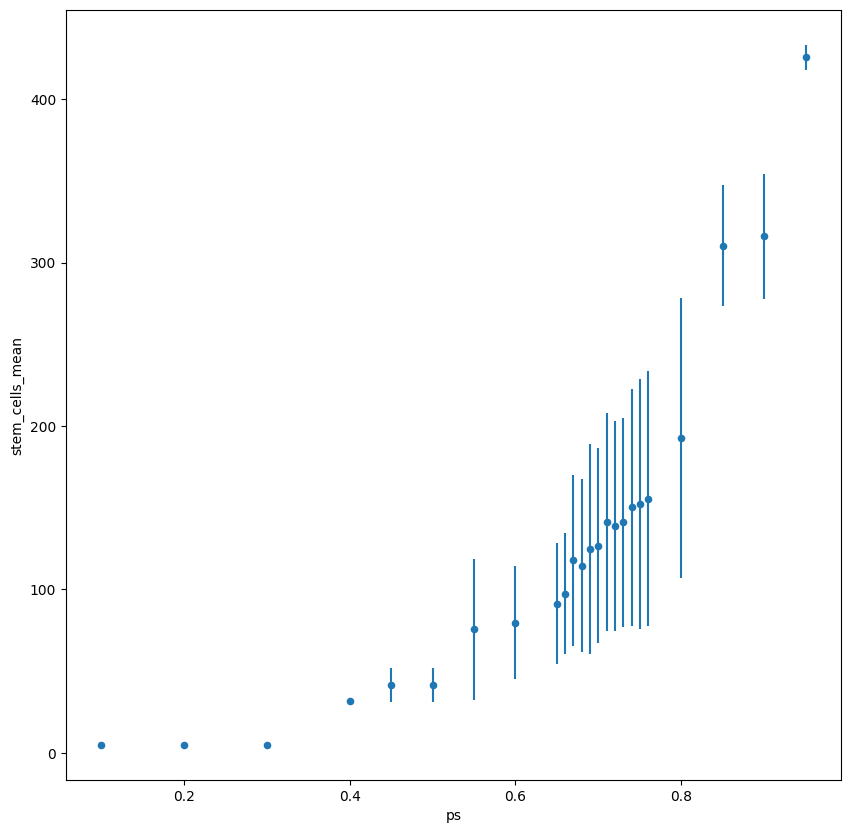

In [14]:
aggregated_df_time10 = aggregated_df.loc[
    aggregated_df["time"].isin([10])
].copy()
aggregated_df_time10.plot(
    x="ps",
    y="stem_cells_mean",
    yerr="stem_cells_std",
    kind="scatter",
    figsize=(10, 10),
    style="--o",
)

<ErrorbarContainer object of 3 artists>

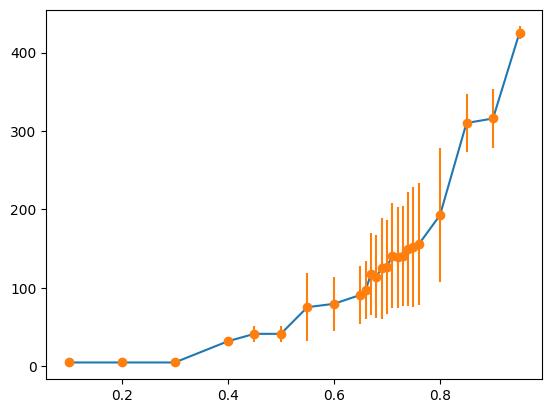

In [15]:
# import require modules
import numpy as np
import matplotlib.pyplot as plt


# defining our function
x = aggregated_df_time10["ps"].values
y = aggregated_df_time10["stem_cells_mean"].values

# defining our error
y_error = aggregated_df_time10["stem_cells_std"].values

# plotting our function and
# error bar
plt.plot(x, y)

plt.errorbar(x, y, yerr=y_error, fmt="o")

Text(0, 0.5, 'Stem cells')

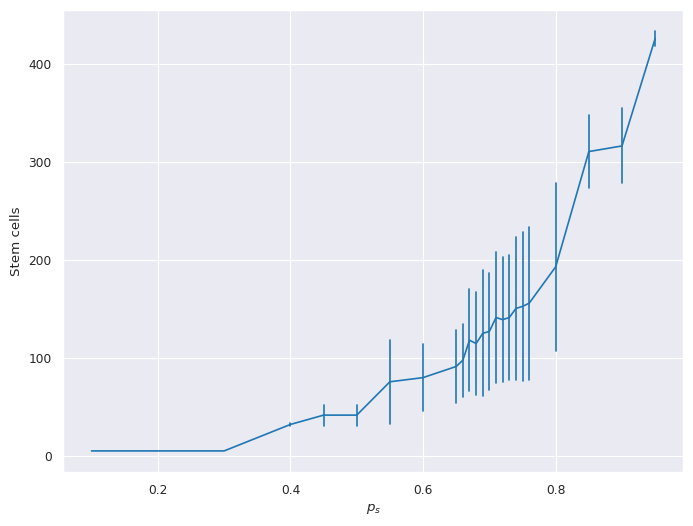

In [16]:
import seaborn as sns

# Let's use the dargrid style
sns.set_style("darkgrid")
sns.set_context("paper")

# we define the dataset
data = df.loc[(df["time"].isin([10])) & (df["pd"].isin([0]))][
    ["ps", "stem_cells"]
].copy()

# we plot the data

sns.lineplot(
    x="ps",
    y="stem_cells",
    data=data,
    errorbar="sd",
    err_style="bars",
    figure=plt.figure(figsize=(8, 6)),
)

# we rename the axes
# the x axis should be rendered as the latex expresion p_s
plt.xlabel("$p_s$")
plt.ylabel("Stem cells")

In [20]:
df1 = pd.read_csv("./sim_9.csv")
df2 = pd.read_csv("./sim_15.csv")
df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat["ps"].unique()

array([0.8 , 0.75, 0.65, 0.73, 0.68, 0.6 , 0.67, 0.9 , 0.4 , 0.7 , 0.72,
       0.74, 0.66, 0.76, 0.85, 0.69, 0.45, 0.71, 0.55, 0.2 , 0.5 , 0.95,
       0.1 , 0.3 , 0.78, 0.77, 0.79])

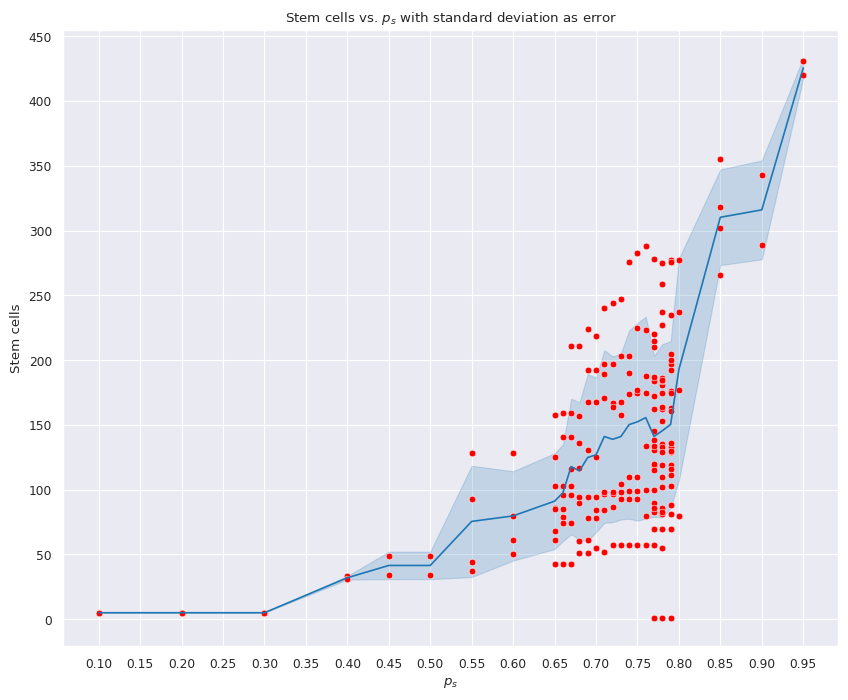

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Let's use the darkgrid style
sns.set_style("darkgrid")
sns.set_context("paper")

# Define the dataset
data = df_concat.loc[(df_concat["time"] == 10) & (df_concat["pd"] == 0)][
    ["ps", "stem_cells"]
].copy()

# Prepare the figure
plt.figure(figsize=(10, 8))

# Plot line and scatter plot
sns.lineplot(
    x="ps",
    y="stem_cells",
    data=data,
    estimator="mean",
    errorbar="sd",
    err_style="band",
)  # bars
sns.scatterplot(x="ps", y="stem_cells", data=data, color="r")

# Set x and y ticks
plt.xticks(np.arange(data["ps"].min(), data["ps"].max() + 0.05, 0.05))
plt.yticks(np.arange(0, data["stem_cells"].max() + 50, 50))

# Rename the axes
plt.xlabel("$p_s$")
plt.ylabel("Stem cells")
plt.title("Stem cells vs. $p_s$ with standard deviation as error")

# Show the plot
plt.show()

In [45]:
df.loc[(df["ps"].isin([0.9])) & (df["time"].isin([10]))]

,culture_id,pd,ps,rng_seed,time,total_cells,active_cells,stem_cells,active_stem_cells
258,9,0.0,0.9,855503480499,10,468,468,343,343
2391,76,0.0,0.9,119245933957897,10,433,433,289,289


CORRECCIÓN: las desviaciones estándar de los totales estaban mal calculadas, va la versión corregida a continuación.

In [26]:
# Adding the standard deviation

# Group by 'time', 'ps', and 'pd', then calculate mean and standard deviation
aggregated_df_ave = df.groupby(["time"]).agg(
    {
        "total_cells": ["mean", "std"],
        "active_cells": ["mean", "std"],
        "stem_cells": ["mean", "std"],
        "active_stem_cells": ["mean", "std"],
    }
)

# Reset the index to make 'time', 'ps', and 'pd' regular columns
aggregated_df_ave.reset_index(inplace=True)

# Optionally, you can flatten the column names
aggregated_df_ave.columns = [
    "_".join(col).strip() if col[1] else col[0]
    for col in aggregated_df_ave.columns.values
]

aggregated_df_ave.loc[(aggregated_df_ave["time"].isin([7, 8, 9, 10, 11]))][
    ["time", "total_cells_mean", "total_cells_std"]
]

,time,total_cells_mean,total_cells_std
7,7,111.765625,3.064874
8,8,189.906250,5.716997
9,9,304.101562,9.235194
10,10,462.281250,13.936265
11,11,672.257812,19.544114


In [25]:
print(
    aggregated_df_ave.loc[(aggregated_df_ave["time"].isin([7, 8, 9, 10, 11]))][
        ["time", "total_cells_mean", "total_cells_std"]
    ]
)

    time  total_cells_mean  total_cells_std
7      7        111.765625         3.064874
8      8        189.906250         5.716997
9      9        304.101562         9.235194
10    10        462.281250        13.936265
11    11        672.257812        19.544114


## $t=9$
(Ver explicación en RJ-2023.11.01.)

In [37]:
df_t_9 = (
    average_df.loc[average_df["time"].isin([9])]
    .groupby(["ps", "pd", "time"])
    .mean()
)  # [['ps', 'total_cells', 'active_cells', 'stem_cells', 'active_stem_cells']]
df_t_9.reset_index(inplace=True)
df_t_9

,ps,pd,time,total_cells,active_cells,stem_cells,active_stem_cells
0,0.10,0.0,9,300.500,300.500,5.000,5.000
1,0.20,0.0,9,300.500,300.500,5.000,5.000
2,0.30,0.0,9,300.500,300.500,5.000,5.000
3,0.40,0.0,9,302.500,302.500,26.000,26.000
4,0.45,0.0,9,303.500,303.500,32.500,32.500
5,0.50,0.0,9,298.500,298.500,32.500,32.500
6,0.55,0.0,9,299.500,299.500,58.500,58.500
7,0.60,0.0,9,299.500,299.500,60.500,60.500
8,0.65,0.0,9,306.875,306.875,70.375,70.375
9,0.66,0.0,9,307.125,307.125,73.500,73.500


En las imágenes experimentales, segmentamos 490, con 188 madres, en total, sin filtrar ni identificar unos con otros. Si el cultivo experimental fuera de 9 días (asumiendo un tiempo de autorreplicación de 1 día), no da el total de células, y para tener el número de madres tendríamos que tener $0.8<p_s<0.85$. Si tomamos sólo la slice 4 (injustificable), tendríamos 301 células con 102 madres, lo cuál equivaldría a $p_s \simeq 0.71$.

## $t=10$

In [39]:
df_t_10 = (
    average_df.loc[average_df["time"].isin([10])]
    .groupby(["ps", "pd", "time"])
    .mean()
)  # [['ps', 'total_cells', 'active_cells', 'stem_cells', 'active_stem_cells']]
df_t_10.reset_index(inplace=True)
df_t_10

,ps,pd,time,total_cells,active_cells,stem_cells,active_stem_cells
0,0.10,0.0,10,457.000,457.000,5.000,5.000
1,0.20,0.0,10,457.000,457.000,5.000,5.000
2,0.30,0.0,10,457.000,457.000,5.000,5.000
3,0.40,0.0,10,462.500,462.500,32.000,32.000
4,0.45,0.0,10,461.500,461.500,41.500,41.500
5,0.50,0.0,10,450.500,450.500,41.500,41.500
6,0.55,0.0,10,454.250,454.250,75.500,75.500
7,0.60,0.0,10,452.250,452.250,79.750,79.750
8,0.65,0.0,10,465.125,465.125,91.125,91.125
9,0.66,0.0,10,467.250,467.250,97.500,97.500


In [41]:
print(df_t_10)

      ps   pd  time  total_cells  active_cells  stem_cells  active_stem_cells
0   0.10  0.0    10      457.000       457.000       5.000              5.000
1   0.20  0.0    10      457.000       457.000       5.000              5.000
2   0.30  0.0    10      457.000       457.000       5.000              5.000
3   0.40  0.0    10      462.500       462.500      32.000             32.000
4   0.45  0.0    10      461.500       461.500      41.500             41.500
5   0.50  0.0    10      450.500       450.500      41.500             41.500
6   0.55  0.0    10      454.250       454.250      75.500             75.500
7   0.60  0.0    10      452.250       452.250      79.750             79.750
8   0.65  0.0    10      465.125       465.125      91.125             91.125
9   0.66  0.0    10      467.250       467.250      97.500             97.500
10  0.67  0.0    10      463.000       463.000     117.875            117.875
11  0.68  0.0    10      464.375       464.375     114.500      

En las imágenes experimentales, segmentamos 490, con 188 madres, en total, sin filtrar ni identificar unos con otros. Si el cultivo experimental fuera de 10 días (asumiendo un tiempo de autorreplicación de 1 día), sigue sin dar el total de células, aunque está más cerca, y para tener el número de madres tendríamos que tener $0.76<p_s<0.8$.

## Making the plot

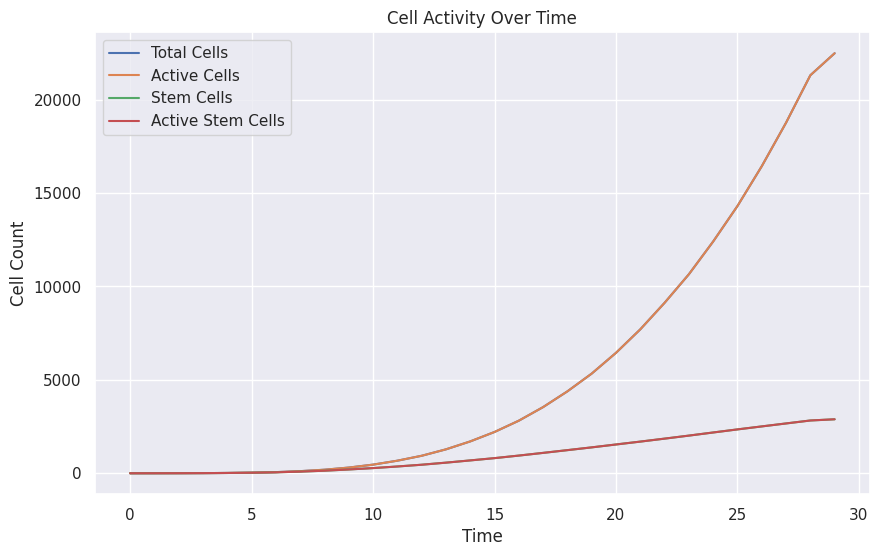

In [5]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(x="time", y="total_cells", data=df_culture_1, label="Total Cells")
sns.lineplot(
    x="time", y="active_cells", data=df_culture_1, label="Active Cells"
)
sns.lineplot(x="time", y="stem_cells", data=df_culture_1, label="Stem Cells")
sns.lineplot(
    x="time",
    y="active_stem_cells",
    data=df_culture_1,
    label="Active Stem Cells",
)

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

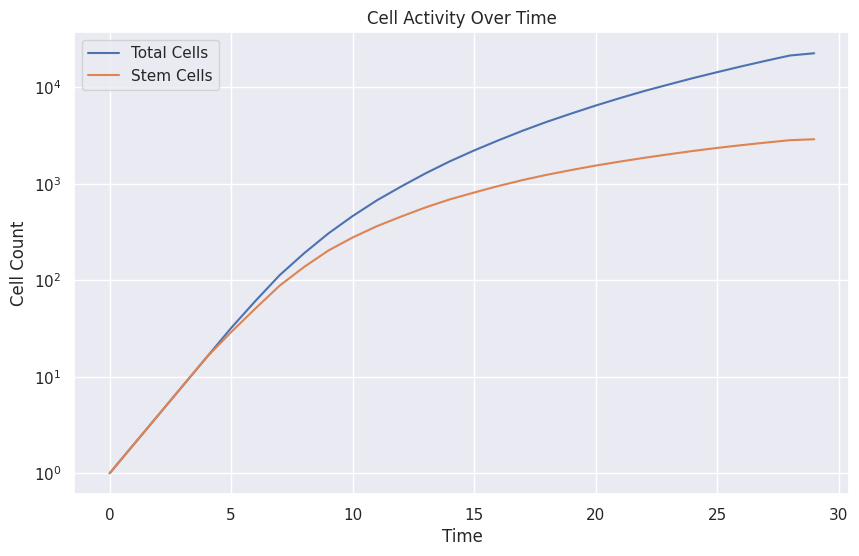

In [7]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(x="time", y="total_cells", data=df_culture_1, label="Total Cells")
# sns.lineplot(
#     x="time", y="active_cells", data=df_culture_1, label="Active Cells"
# )
sns.lineplot(x="time", y="stem_cells", data=df_culture_1, label="Stem Cells")
# sns.lineplot(
#     x="time",
#     y="active_stem_cells",
#     data=df_culture_1,
#     label="Active Stem Cells",
# )

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")
plt.yscale("log")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

## Comparing with the old simulations
We compare this new curves with the ones produced by the first versions of the code.

In [20]:
df_old = pd.read_csv("./sample_old_dat_file__0.1-1.dat")
df_old

,total_cells,active_cells,stem_cells,active_stem_cells
0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,1.0
2,4.0,4.0,1.0,1.0
3,8.0,8.0,2.0,2.0
4,16.0,16.0,2.0,2.0
...,...,...,...,...
56,209467.0,24064.0,6.0,0.0
57,221984.0,25034.0,6.0,0.0
58,234886.0,25804.0,6.0,0.0
59,248354.0,26936.0,6.0,0.0


Let's add the time column and filter up to 29 days.

In [28]:
df_old["time"] = df_old.index + 1
df_old

,total_cells,active_cells,stem_cells,active_stem_cells,time
0,1.0,1.0,1.0,1.0,1
1,2.0,2.0,1.0,1.0,2
2,4.0,4.0,1.0,1.0,3
3,8.0,8.0,2.0,2.0,4
4,16.0,16.0,2.0,2.0,5
...,...,...,...,...,...
56,209467.0,24064.0,6.0,0.0,57
57,221984.0,25034.0,6.0,0.0,58
58,234886.0,25804.0,6.0,0.0,59
59,248354.0,26936.0,6.0,0.0,60


In [30]:
df_old_filtered = df_old.loc[df_old["time"] < 30]
df_old_filtered = df_old_filtered[
    ["time", "total_cells", "active_cells", "stem_cells", "active_stem_cells"]
]

In [31]:
df_old_filtered

,time,total_cells,active_cells,stem_cells,active_stem_cells
0,1,1.0,1.0,1.0,1.0
1,2,2.0,2.0,1.0,1.0
2,3,4.0,4.0,1.0,1.0
3,4,8.0,8.0,2.0,2.0
4,5,16.0,16.0,2.0,2.0
5,6,32.0,32.0,2.0,2.0
6,7,63.0,62.0,2.0,2.0
7,8,115.0,104.0,2.0,2.0
8,9,191.0,152.0,2.0,2.0
9,10,298.0,214.0,2.0,2.0


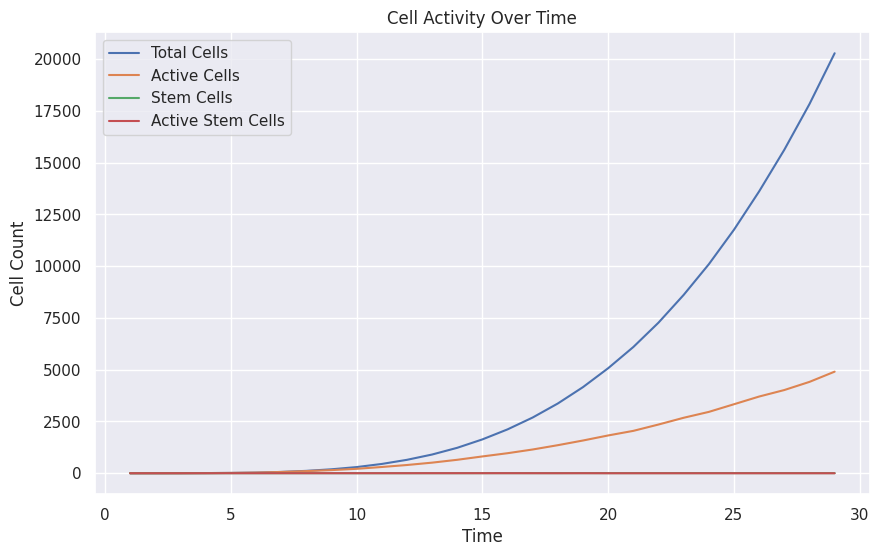

In [32]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(
    x="time", y="total_cells", data=df_old_filtered, label="Total Cells"
)
sns.lineplot(
    x="time", y="active_cells", data=df_old_filtered, label="Active Cells"
)
sns.lineplot(
    x="time", y="stem_cells", data=df_old_filtered, label="Stem Cells"
)
sns.lineplot(
    x="time",
    y="active_stem_cells",
    data=df_old_filtered,
    label="Active Stem Cells",
)

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Grafiquemos las poblaciones totales en ambos casos (recordemos que el código original no era isotrópico).

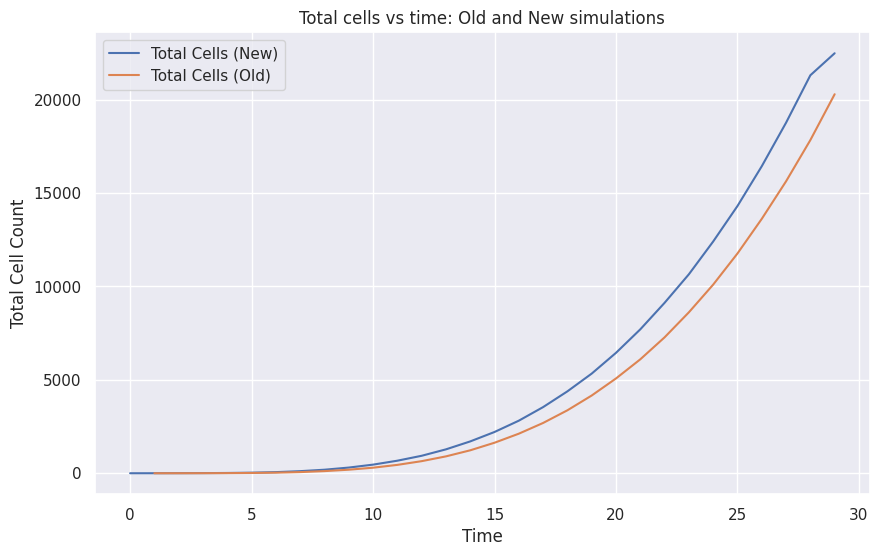

In [33]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(
    x="time", y="total_cells", data=df_culture_1, label="Total Cells (New)"
)
sns.lineplot(
    x="time", y="total_cells", data=df_old_filtered, label="Total Cells (Old)"
)

# Add title and labels
plt.title("Total cells vs time: Old and New simulations")
plt.xlabel("Time")
plt.ylabel("Total Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()